Data retrieved from frost.met.no!
                       elementId  value unit timeOffset timeResolution  \
0  sum(precipitation_amount P1D)    0.3   mm      PT18H            P1D   
1  sum(precipitation_amount P1D)    0.1   mm       PT6H            P1D   
2  sum(precipitation_amount P1D)   11.1   mm      PT18H            P1D   
3  sum(precipitation_amount P1D)    1.8   mm       PT6H            P1D   
4  sum(precipitation_amount P1D)    6.1   mm      PT18H            P1D   

   timeSeriesId performanceCategory exposureCategory  qualityCode  \
0             0                   C                2          NaN   
1             0                   C                2          0.0   
2             0                   C                2          NaN   
3             0                   C                2          0.0   
4             0                   C                2          NaN   

              referenceTime   sourceId level  
0  2024-12-24T00:00:00.000Z  SN68090:0   NaN  
1  2024-12-2

/var/folders/2y/z0z72b8534j68rb81zfyqw_c0000gn/T/ipykernel_3841/513961111.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_data['referenceTime'] = pd.to_datetime(temperature_data['referenceTime'])
/var/folders/2y/z0z72b8534j68rb81zfyqw_c0000gn/T/ipykernel_3841/513961111.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precipitation_data['referenceTime'] = pd.to_datetime(precipitation_data['referenceTime'])


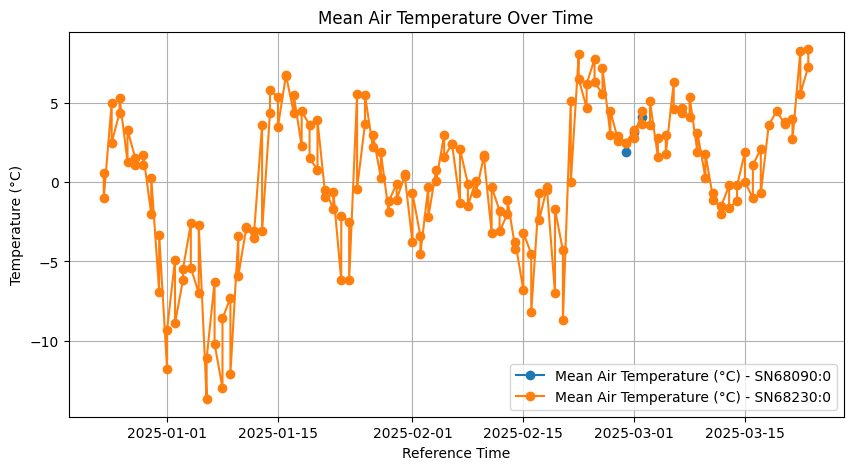

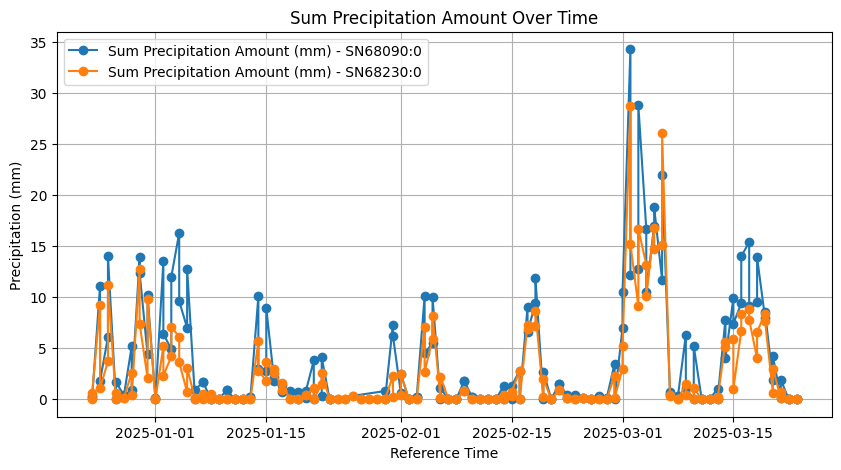

/var/folders/2y/z0z72b8534j68rb81zfyqw_c0000gn/T/ipykernel_3841/513961111.py:94: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


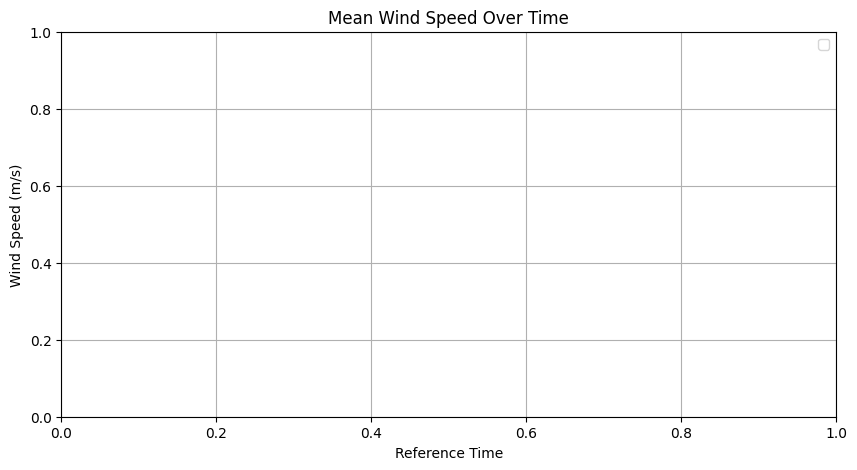

In [21]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
from datetime import timedelta

now = datetime.now()
offset = now - timedelta(days=90)
# Hent dagens dato
current_date = now.strftime("%Y-%m-%d")
# Beregn datoen for ett år siden
historic_date = offset.strftime("%Y-%m-%d")

# Insert your own client ID here
client_id = '2e243d34-57bc-42b4-8095-239991af5353'
# Define endpoint and parameters
endpoint = 'https://frost.met.no/observations/v0.jsonld'
parameters = {
    'sources': 'SN68090,SN68230',
    'elements': 'mean(air_temperature P1D),sum(precipitation_amount P1D),mean(wind_speed P1D)',
    'referencetime': f'{historic_date}/{current_date}',
}
# Issue an HTTP GET request
r = requests.get(endpoint, parameters, auth=(client_id,''))
# Extract JSON data
json = r.json()

# Check if the request worked, print out any errors
if r.status_code == 200:
    data = json['data']
    print('Data retrieved from frost.met.no!')
else:
    print('Error! Returned status code %s' % r.status_code)
    print('Message: %s' % json['error']['message'])
    print('Reason: %s' % json['error']['reason'])

important_keys = ['elementId', 'value', 'unit', 'timeOffset', 'timeResolution', 'qualityCode']

# Collect the important data into a list of dictionaries
df_list = []

for item in data:
    row = pd.DataFrame(item['observations'])
    row['referenceTime'] = item['referenceTime']
    row['sourceId'] = item['sourceId']
    df_list.append(row)

# Efficiently concatenate all DataFrames at once
df = pd.concat(df_list, ignore_index=True)

# Display the DataFrame
print(df.head())

# Plotting the data
# Separate the data by elementId
temperature_data = df[df['elementId'] == 'mean(air_temperature P1D)']
precipitation_data = df[df['elementId'] == 'sum(precipitation_amount P1D)']
wind_speed_data = df[df['elementId'] == 'mean(wind_speed P1D)']

# Convert referencetime to datetime
temperature_data['referenceTime'] = pd.to_datetime(temperature_data['referenceTime'])
precipitation_data['referenceTime'] = pd.to_datetime(precipitation_data['referenceTime'])
wind_speed_data['referenceTime'] = pd.to_datetime(wind_speed_data['referenceTime'])

# Plot mean air temperature
plt.figure(figsize=(10, 5))
for source_id, group in temperature_data.groupby('sourceId'):
    plt.plot(group['referenceTime'], group['value'], marker='o', label=f'Mean Air Temperature (°C) - {source_id}')
plt.xlabel('Reference Time')
plt.ylabel('Temperature (°C)')
plt.title('Mean Air Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot sum precipitation amount
plt.figure(figsize=(10, 5))
for source_id, group in precipitation_data.groupby('sourceId'):
    plt.plot(group['referenceTime'], group['value'], marker='o', label=f'Sum Precipitation Amount (mm) - {source_id}')
plt.xlabel('Reference Time')
plt.ylabel('Precipitation (mm)')
plt.title('Sum Precipitation Amount Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot mean wind speed
plt.figure(figsize=(10, 5))
for source_id, group in wind_speed_data.groupby('sourceId'):
    plt.plot(group['referenceTime'], group['value'], marker='o', label=f'Mean Wind Speed (m/s) - {source_id}')
plt.xlabel('Reference Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Mean Wind Speed Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
print(df)

                         elementId  value  unit  \
0        mean(air_temperature P1D)    3.2  degC   
1        mean(air_temperature P1D)    3.0  degC   
2    sum(precipitation_amount P1D)   13.5    mm   
3    sum(precipitation_amount P1D)   29.0    mm   
4             mean(wind_speed P1D)    1.7   m/s   
..                             ...    ...   ...   
325      mean(air_temperature P1D)    2.6  degC   
326      mean(air_temperature P1D)    2.2  degC   
327  sum(precipitation_amount P1D)    1.0    mm   
328  sum(precipitation_amount P1D)    8.6    mm   
329           mean(wind_speed P1D)    5.2   m/s   

                                                 level timeOffset  \
0    {'levelType': 'height_above_ground', 'unit': '...       PT0H   
1    {'levelType': 'height_above_ground', 'unit': '...       PT6H   
2                                                  NaN      PT18H   
3                                                  NaN       PT6H   
4    {'levelType': 'height_above_ground', 

In [16]:
from datetime import datetime, timedelta

now = datetime.now()

one_year_ago = now - timedelta(days=365)

# Hent dagens dato
current_date = datetime.now().date()

# Beregn datoen for ett år siden
date_time_1=one_year_ago.strftime("%Y-%m-%d")

date_time=now.strftime("%Y-%m-%d")

print(type(one_year_ago))
print(date_time_1)
print(type(date_time))

<class 'datetime.datetime'>
2024-03-24
<class 'str'>
